In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#I have decided to shrink the scope of this data from the span of 2014-2020 seasons to only the 2020. This will eliminate
#a lot of extrapolation and potential overfitting

In [2]:
raptor = pd.read_csv('raptor')
player = pd.read_csv('newplayer')
total = pd.read_csv('total')
game = pd.read_csv('game')
home_wins = pd.read_csv('homewins')
team = pd.read_csv('team')
games_40 = pd.read_csv('40games')

In [3]:
#team.head()
team = team.rename(columns = {'id':'TEAM_ID'})
team.head()

,Unnamed: 0,TEAM_ID,full_name,abbreviation,nickname,city,state,year_founded
0,0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
no_team = player['TEAM_NAME'].isna()
player = player[no_team == False]
player = player.rename(columns = {'ID':'Player ID', 'DISPLAY_FIRST_LAST': 'Player Name', 'GAMES_PLAYED_CURRENT_SEASON_FLAG': 'Current Player'})
player = player.loc[:, ~player.columns.str.contains('^Unnamed')]
player = player.drop(['FIRST_NAME', 'LAST_NAME', 'GAMES_PLAYED_FLAG'], axis=1)
player

,Player ID,Player Name,ROSTERSTATUS,Current Player,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TO_YEAR,PTS,AST,REB
3,203919,Jordan Adams,Inactive,N,1610612763,Grizzlies,MEM,2015,3.2,0.6,0.9
4,203500,Steven Adams,Active,Y,1610612740,Pelicans,NOP,2020,8.1,2.0,9.2
5,1628389,Bam Adebayo,Active,Y,1610612748,Heat,MIA,2020,19.2,5.4,9.5
6,1629061,Deng Adel,Inactive,N,1610612739,Cavaliers,CLE,2018,1.7,0.3,1.0
8,201167,Arron Afflalo,Inactive,N,1610612753,Magic,ORL,2017,10.8,1.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...
1023,203092,Tyler Zeller,Inactive,N,1610612759,Spurs,SAS,2019,6.9,0.9,4.4
1025,1627757,Stephen Zimmerman,Inactive,N,1610612753,Magic,ORL,2016,1.2,0.2,1.8
1026,1627835,Paul Zipser,Inactive,N,1610612741,Bulls,CHI,2017,4.7,0.8,2.6
1027,1627790,Ante Zizic,Inactive,N,1610612739,Cavaliers,CLE,2019,6.0,0.6,3.9


In [5]:
print(len(pd.unique(player['Player Name'])))
print(len(pd.unique(player['TEAM_NAME'])))

817
32


In [6]:
raptor

,Unnamed: 0,Player Name,player_id,season,poss,Minutes Played,raptor_offense,raptor_defense,raptor_total,war_reg_season,predator_total
0,0,Alex Abrines,abrinal01,2017,2387,1135,0.543421,-1.144832,-0.601411,1.447708,-0.961575
1,1,Alex Abrines,abrinal01,2018,2546,1244,-0.020826,-1.502642,-1.523468,0.465912,-1.287247
2,2,Alex Abrines,abrinal01,2019,1279,588,-4.040157,1.885618,-2.154538,0.178167,-3.034396
3,3,Precious Achiuwa,achiupr01,2021,1581,749,-4.347596,0.954821,-3.392775,-0.246776,-3.342885
4,4,Quincy Acy,acyqu01,2014,1716,847,-1.565257,-0.216477,-1.781734,0.415918,-1.688171
...,...,...,...,...,...,...,...,...,...,...,...
2838,4072,Ante Zizic,zizican01,2019,2240,1082,-2.073401,-0.690914,-2.764315,-0.007877,-4.416713
2839,4074,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-6.465707
2840,4076,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.114995,-1.652459
2841,4077,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,5.020903,3.021132


In [7]:

raptor.set_index('player_id', inplace=True)
raptor.head()
#raptor_comp = raptor[raptor['Player Name', 'player_id', 'season', 'Minutes Played', 'raptor_total', 'war_reg_season']]

,Unnamed: 0,Player Name,season,poss,Minutes Played,raptor_offense,raptor_defense,raptor_total,war_reg_season,predator_total
player_id,,,,,,,,,,
abrinal01,0,Alex Abrines,2017,2387,1135,0.543421,-1.144832,-0.601411,1.447708,-0.961575
abrinal01,1,Alex Abrines,2018,2546,1244,-0.020826,-1.502642,-1.523468,0.465912,-1.287247
abrinal01,2,Alex Abrines,2019,1279,588,-4.040157,1.885618,-2.154538,0.178167,-3.034396
achiupr01,3,Precious Achiuwa,2021,1581,749,-4.347596,0.954821,-3.392775,-0.246776,-3.342885
acyqu01,4,Quincy Acy,2014,1716,847,-1.565257,-0.216477,-1.781734,0.415918,-1.688171


In [8]:
raptor = raptor.loc[:, ~raptor.columns.str.contains('^Unnamed')]
raptor.head()
raptor_comp = raptor.drop(['poss', 'raptor_offense', 'raptor_defense', 'predator_total'], axis=1)

In [9]:
raptor_comp = raptor_comp.rename(columns = {'raptor_total': 'Raptor Total', 'war_reg_season': 'WAR'})
raptor_comp

,Player Name,season,Minutes Played,Raptor Total,WAR
player_id,,,,,
abrinal01,Alex Abrines,2017,1135,-0.601411,1.447708
abrinal01,Alex Abrines,2018,1244,-1.523468,0.465912
abrinal01,Alex Abrines,2019,588,-2.154538,0.178167
achiupr01,Precious Achiuwa,2021,749,-3.392775,-0.246776
acyqu01,Quincy Acy,2014,847,-1.781734,0.415918
...,...,...,...,...,...
zizican01,Ante Zizic,2019,1082,-2.764315,-0.007877
zubaciv01,Ivica Zubac,2017,609,-6.398767,-1.141160
zubaciv01,Ivica Zubac,2019,1079,-0.548676,1.114995


In [10]:
raptor_comp.dtypes

Player Name        object
season              int64
Minutes Played      int64
Raptor Total      float64
WAR               float64
dtype: object

In [11]:
raptor2020 = raptor_comp[raptor_comp['season'] == 2020]
raptor2020.head()

,Player Name,season,Minutes Played,Raptor Total,WAR
player_id,,,,,
adamsst01,Steven Adams,2020,1890,1.973205,4.329823
adebaba01,Bam Adebayo,2020,3104,2.122704,5.311195
aldrila01,LaMarcus Aldridge,2020,1754,0.116579,2.530917
alexani01,Nickeil Alexander-Walker,2020,591,-3.227194,-0.144990
allengr01,Grayson Allen,2020,718,-1.397200,0.497798


In [12]:
print(len(pd.unique(total['WL_AWAY'])))
missing_wl = total[['WL_HOME', 'WL_AWAY', 'TEAM_WINS_LOSSES_HOME', 'TEAM_WINS_LOSSES_AWAY']].isna().sum(axis=1)
total = total[missing_wl == 0]

print(len(pd.unique(total['WL_AWAY'])))
total.head()

3
2


,Unnamed: 0,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,PTS_HOME,...,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,WL_AWAY,PTS_AWAY,GAMECODE,TEAM_WINS_LOSSES_HOME,TEAM_WINS_LOSSES_AWAY,year,Total
12,54293,21400144,22014,1610612760,OKC,Oklahoma City Thunder,2014-11-16,OKC vs. HOU,L,65,...,1610612745,HOU,Houston Rockets,W,69,20141116/HOUOKC,3-8,9-1,2014,134
17,54184,21400028,22014,1610612766,CHA,Charlotte Hornets,2014-11-01,CHA vs. MEM,L,69,...,1610612763,MEM,Memphis Grizzlies,W,71,20141101/MEMCHA,1-1,3-0,2014,140
20,56786,21600180,22016,1610612742,DAL,Dallas Mavericks,2016-11-18,DAL vs. MEM,L,64,...,1610612763,MEM,Memphis Grizzlies,W,80,20161118/MEMDAL,2-9,7-5,2016,144
21,55165,21401018,22014,1610612756,PHX,Phoenix Suns,2015-03-19,PHX vs. NOP,W,74,...,1610612740,NOP,New Orleans Pelicans,L,72,20150319/NOPPHX,36-33,37-31,2015,146
22,54803,21400652,22014,1610612766,CHA,Charlotte Hornets,2015-01-24,CHA vs. NYK,W,76,...,1610612752,NYK,New York Knicks,L,71,20150124/NYKCHA,19-26,8-37,2015,147


In [13]:
total = total.loc[:, ~total.columns.str.contains('^Unnamed')]
#total.head()
total = total.rename(columns = {'TEAM_ABBREVIATION_HOME': 'Home Team', 'TEAM_ABBREVIATION_AWAY':'Away Team'})
#total.head()
total_comp = total.drop(['GAME_DATE', 'GAMECODE'], axis=1)

In [14]:
game = game.loc[:, ~game.columns.str.contains('^Unnamed')]
game.head()


,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,...,TEAM_WINS_LOSSES_AWAY,year,Total,home_wins,home_losses,away_wins,away_losses,home_pct,away_pct,total_games_played
0,21300472,22013,1610612746,LAC,Los Angeles Clippers,2014-01-01,LAC vs. CHA,W,112,27,...,14-19,2014,197,22,12,14,19,0.647059,0.424242,67
1,21300471,22013,1610612743,DEN,Denver Nuggets,2014-01-01,DEN vs. PHI,L,102,-12,...,10-21,2014,216,14,17,10,21,0.451613,0.322581,62
2,21300470,22013,1610612750,MIN,Minnesota Timberwolves,2014-01-01,MIN vs. NOP,W,124,12,...,14-16,2014,236,16,16,14,16,0.500000,0.466667,62
3,21300469,22013,1610612761,TOR,Toronto Raptors,2014-01-01,TOR vs. IND,W,95,13,...,25-6,2014,177,15,15,25,6,0.500000,0.806452,61
4,21300468,22013,1610612764,WAS,Washington Wizards,2014-01-01,WAS vs. DAL,L,78,-9,...,19-13,2014,165,14,15,19,13,0.482759,0.593750,61


In [15]:
games_40 = games_40.drop(['GAME_DATE', 'MATCHUP_HOME', 'GAMECODE', 'TEAM_WINS_LOSSES_HOME', 'TEAM_WINS_LOSSES_AWAY', 'home_wins', 'home_losses', 'away_wins', 'away_losses'], axis=1)
games_40.columns

Index(['Unnamed: 0', 'GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME',
       'TEAM_ABBREVIATION_HOME', 'TEAM_NAME_HOME', 'WL_HOME', 'PTS_HOME',
       'PLUS_MINUS_HOME', 'TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY',
       'TEAM_NAME_AWAY', 'WL_AWAY', 'PTS_AWAY', 'year', 'Total', 'home_pct',
       'away_pct', 'total_games_played'],
      dtype='object')

In [16]:
games_40 = games_40.loc[:, ~games_40.columns.str.contains('^Unnamed')]
games_40 = games_40.rename({'TEAM_ABBREVIATION_HOME': 'Home Team', 'TEAM_ABBREVIATION_AWAY': 'Away Team'})
games_40.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,WL_AWAY,PTS_AWAY,year,Total,home_pct,away_pct,total_games_played
0,21500419,22015,1610612755,PHI,Philadelphia 76ers,L,90,-14,1610612763,MEM,Memphis Grizzlies,W,104,2015,194,0.033333,0.533333,60
1,21500388,22015,1610612755,PHI,Philadelphia 76ers,L,97,-10,1610612752,NYK,New York Knicks,W,107,2015,204,0.035714,0.481481,55
2,21500335,22015,1610612755,PHI,Philadelphia 76ers,L,95,-12,1610612765,DET,Detroit Pistons,W,107,2015,202,0.041667,0.541667,48
3,21500305,22015,1610612755,PHI,Philadelphia 76ers,L,68,-51,1610612759,SAS,San Antonio Spurs,W,119,2015,187,0.045455,0.818182,44
4,21500289,22015,1610612755,PHI,Philadelphia 76ers,L,105,-3,1610612743,DEN,Denver Nuggets,W,108,2015,213,0.047619,0.380952,42


In [17]:
home_wins.head()

,Unnamed: 0,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,PTS_HOME,...,TEAM_WINS_LOSSES_AWAY,year,Total,home_wins,home_losses,away_wins,away_losses,home_pct,away_pct,total_games_played
0,54216,21400058,22014,1610612755,PHI,Philadelphia 76ers,2014-11-05,PHI vs. ORL,L,89,...,1-4,2014,180,0,5,1,4,0.0,0.20,10
1,55456,21500077,22015,1610612751,BKN,Brooklyn Nets,2015-11-06,BKN vs. LAL,L,98,...,1-4,2015,202,0,6,1,4,0.0,0.20,11
2,55427,21500047,22015,1610612751,BKN,Brooklyn Nets,2015-11-02,BKN vs. MIL,L,96,...,1-3,2015,199,0,4,1,3,0.0,0.25,8
3,55437,21500056,22015,1610612740,NOP,New Orleans Pelicans,2015-11-03,NOP vs. ORL,L,94,...,1-3,2015,197,0,4,1,3,0.0,0.25,8
4,56654,21600046,22016,1610612755,PHI,Philadelphia 76ers,2016-11-01,PHI vs. ORL,L,101,...,1-3,2016,204,0,3,1,3,0.0,0.25,7


In [18]:
games_40 = games_40[games_40['SEASON_ID'] == 22020]

In [19]:
rap_player = pd.merge(player, raptor2020, how='left', on=['Player Name'])
rap_player.head()

,Player ID,Player Name,ROSTERSTATUS,Current Player,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TO_YEAR,PTS,AST,REB,season,Minutes Played,Raptor Total,WAR
0,203919,Jordan Adams,Inactive,N,1610612763,Grizzlies,MEM,2015,3.2,0.6,0.9,NaN,NaN,NaN,NaN
1,203500,Steven Adams,Active,Y,1610612740,Pelicans,NOP,2020,8.1,2.0,9.2,2020.0,1890.0,1.973205,4.329823
2,1628389,Bam Adebayo,Active,Y,1610612748,Heat,MIA,2020,19.2,5.4,9.5,2020.0,3104.0,2.122704,5.311195
3,1629061,Deng Adel,Inactive,N,1610612739,Cavaliers,CLE,2018,1.7,0.3,1.0,NaN,NaN,NaN,NaN
4,201167,Arron Afflalo,Inactive,N,1610612753,Magic,ORL,2017,10.8,1.8,2.9,NaN,NaN,NaN,NaN


In [20]:
player_team = pd.merge(team, rap_player, how='left', on=['TEAM_ID'])
player_team
player_team = player_team.drop(['city', 'abbreviation', 'Current Player', 'season', 'TEAM_NAME','state', 'nickname', 'year_founded', 'TEAM_ABBREVIATION'], axis=1)


In [21]:
player_team = player_team.loc[:, ~player_team.columns.str.contains('^Unnamed')]
player_team.head()
player_team.shape
player_team.dtypes

TEAM_ID             int64
full_name          object
Player ID           int64
Player Name        object
ROSTERSTATUS       object
TO_YEAR             int64
PTS               float64
AST               float64
REB               float64
Minutes Played    float64
Raptor Total      float64
WAR               float64
dtype: object

In [22]:
active_team = player_team[player_team['ROSTERSTATUS'] == 'Active']
active_team.head()

,TEAM_ID,full_name,Player ID,Player Name,ROSTERSTATUS,TO_YEAR,PTS,AST,REB,Minutes Played,Raptor Total,WAR
1,1610612737,Atlanta Hawks,203992,Bogdan Bogdanovic,Active,2020,9.6,2.3,3.3,1766.0,1.214297,3.551855
3,1610612737,Atlanta Hawks,203991,Clint Capela,Active,2020,14.3,0.9,14.2,1279.0,3.131466,3.843458
5,1610612737,Atlanta Hawks,1628381,John Collins,Active,2020,18.3,1.3,7.8,1363.0,-0.374658,1.654029
8,1610612737,Atlanta Hawks,1627739,Kris Dunn,Active,2020,7.3,3.4,3.6,1269.0,2.458975,3.376501
9,1610612737,Atlanta Hawks,1628981,Bruno Fernando,Active,2020,1.5,0.4,3.0,713.0,-3.694992,-0.343127


In [23]:
teams = active_team['full_name'].unique()

In [24]:
philadelphia = active_team[active_team['full_name'] == 'Philadelphia 76ers']
print(philadelphia)
total_points = philadelphia['PTS'].sum()
total_points

        TEAM_ID           full_name  Player ID        Player Name  \
483  1610612755  Philadelphia 76ers    1628396       Tony Bradley   
485  1610612755  Philadelphia 76ers     203552         Seth Curry   
487  1610612755  Philadelphia 76ers     203954        Joel Embiid   
488  1610612755  Philadelphia 76ers    1628390  Terrance Ferguson   
489  1610612755  Philadelphia 76ers     201980        Danny Green   
491  1610612755  Philadelphia 76ers     202699      Tobias Harris   
494  1610612755  Philadelphia 76ers       2730      Dwight Howard   
496  1610612755  Philadelphia 76ers    1627788     Furkan Korkmaz   
498  1610612755  Philadelphia 76ers    1629003       Shake Milton   
501  1610612755  Philadelphia 76ers    1629738    Vincent Poirier   
502  1610612755  Philadelphia 76ers     203118         Mike Scott   
505  1610612755  Philadelphia 76ers    1627732        Ben Simmons   
509  1610612755  Philadelphia 76ers    1629680   Matisse Thybulle   
510  1610612755  Philadelphia 76er

135.79999999999998

In [25]:
active_team.describe().T
#Why are the first 6 columns missing 90 values?

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,409.0,1.610613e+09,8.540859,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
Player ID,409.0,1.046193e+06,705880.933786,2.544000e+03,2.031450e+05,1.627742e+06,1.629003e+06,1.629752e+06
TO_YEAR,409.0,2.020000e+03,0.000000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
PTS,409.0,9.991687e+00,6.868133,0.000000e+00,4.800000e+00,8.300000e+00,1.380000e+01,3.180000e+01
AST,409.0,2.206601e+00,1.971048,0.000000e+00,9.000000e-01,1.500000e+00,3.000000e+00,1.120000e+01
REB,409.0,3.989242e+00,2.505539,0.000000e+00,2.200000e+00,3.500000e+00,5.200000e+00,1.420000e+01
Minutes Played,319.0,1.552583e+03,611.347207,5.040000e+02,1.061000e+03,1.531000e+03,2.017500e+03,3.104000e+03
Raptor Total,319.0,-4.141589e-04,2.807849,-9.123487e+00,-1.761376e+00,-6.596810e-02,1.696298e+00,1.046684e+01
WAR,319.0,2.260374e+00,2.610962,-3.522241e+00,5.502804e-01,1.791715e+00,3.406973e+00,1.670559e+01


In [26]:
active_team = active_team.dropna()
active_team.describe()

,TEAM_ID,Player ID,TO_YEAR,PTS,AST,REB,Minutes Played,Raptor Total,WAR
count,3.190000e+02,3.190000e+02,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.610613e+09,9.405311e+05,2020.0,11.325392,2.522571,4.384953,1552.583072,-0.000414,2.260374
std,8.659729e+00,7.180406e+05,0.0,6.646436,2.026970,2.517378,611.347207,2.807849,2.610962
min,1.610613e+09,2.544000e+03,2020.0,0.000000,0.100000,0.000000,504.000000,-9.123487,-3.522241
25%,1.610613e+09,2.030825e+05,2020.0,6.350000,1.100000,2.600000,1061.000000,-1.761376,0.550280
50%,1.610613e+09,1.626161e+06,2020.0,9.700000,1.700000,3.800000,1531.000000,-0.065968,1.791715
75%,1.610613e+09,1.628421e+06,2020.0,14.950000,3.400000,5.500000,2017.500000,1.696298,3.406973
max,1.610613e+09,1.629744e+06,2020.0,31.800000,11.200000,14.200000,3104.000000,10.466843,16.705593


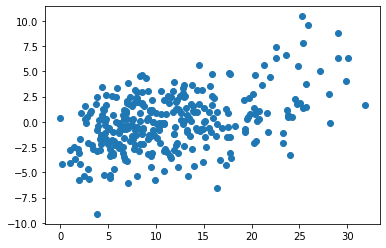

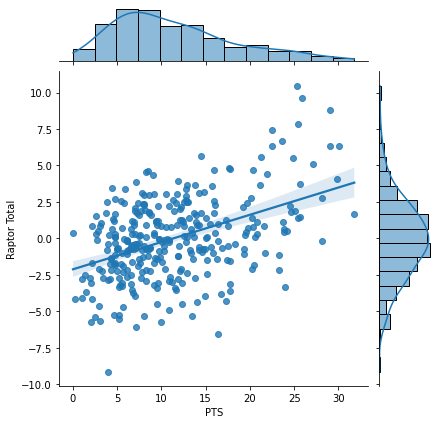

In [27]:
plt.scatter(active_team['PTS'], active_team['Raptor Total'])
sns.jointplot(x='PTS', y='Raptor Total', data=active_team, kind="reg");

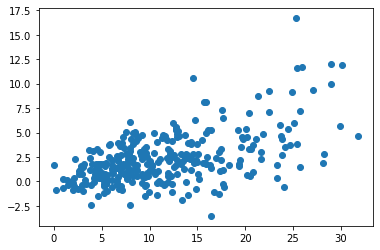

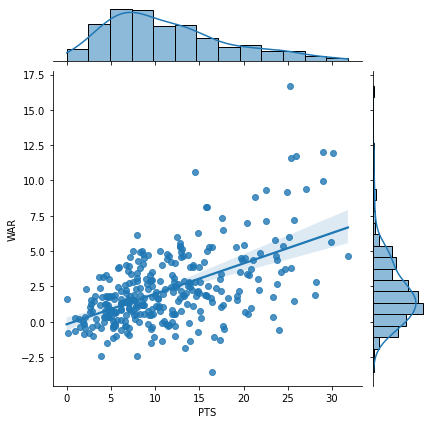

In [28]:
plt.scatter(active_team['PTS'], active_team['WAR'])
sns.jointplot(x='PTS', y='WAR', data=active_team, kind="reg");

In [29]:
print(active_team.PTS.mean())

11.325391849529781


Text(0.5, 0, 'Average Points')

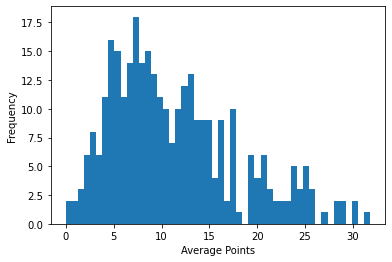

In [30]:
ax = active_team.PTS.plot(kind='hist', bins=50)
ax.set_xlabel("Average Points")


In [31]:
team_dict = {}

for i in teams:
    team2020 = active_team[active_team['full_name'] == i]
    total_points = team2020['PTS'].sum()
    team_dict[i]=round(total_points, 2)
    
team_dict

{'Atlanta Hawks': 143.0,
 'Boston Celtics': 122.2,
 'Cleveland Cavaliers': 125.1,
 'New Orleans Pelicans': 118.0,
 'Chicago Bulls': 112.2,
 'Dallas Mavericks': 135.8,
 'Denver Nuggets': 123.1,
 'Golden State Warriors': 83.2,
 'Houston Rockets': 105.4,
 'Los Angeles Clippers': 130.2,
 'Los Angeles Lakers': 121.8,
 'Miami Heat': 123.9,
 'Milwaukee Bucks': 119.5,
 'Minnesota Timberwolves': 101.5,
 'Brooklyn Nets': 132.0,
 'New York Knicks': 122.2,
 'Orlando Magic': 139.4,
 'Indiana Pacers': 140.8,
 'Philadelphia 76ers': 131.0,
 'Phoenix Suns': 128.1,
 'Portland Trail Blazers': 132.6,
 'Sacramento Kings': 95.5,
 'San Antonio Spurs': 112.2,
 'Oklahoma City Thunder': 108.3,
 'Toronto Raptors': 126.1,
 'Utah Jazz': 119.4,
 'Memphis Grizzlies': 127.5,
 'Washington Wizards': 138.0,
 'Detroit Pistons': 88.4,
 'Charlotte Hornets': 106.4}

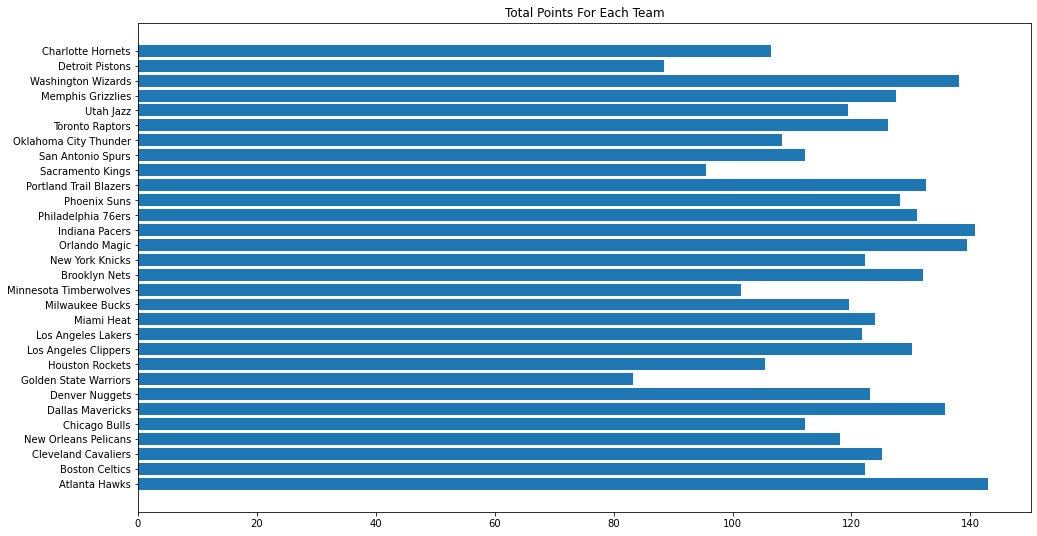

In [32]:
teams_new = list(team_dict.keys())
points = list(team_dict.values())

fig, ax2 = plt.subplots(figsize=(16, 9))

ax2.barh(teams_new, points,height=0.8)
ax2.set_title('Total Points For Each Team')
plt.show()

In [33]:
#Now to look at individual games, we need to add both teams and the players involved

In [34]:
home_team = active_team
home_team = home_team.rename(columns = {'TEAM_ID':'TEAM_ID_HOME', 'Player ID':'Home Player ID','full_name':'Home Team', \
                                       'abbreviation':'Home Short', 'Player Name': 'Home Player', 'TO_YEAR':'Season', \
                                       'ROSTERSTATUS':'Active?', 'PTS':'Home Points', 'AST':'Home Assists', 'REB':'Home Rebounds',\
                                       'Minutes Played':'Home Minutes','Raptor Total':'Home Raptor','WAR':'Home WAR'})
home_team = home_team.drop(['Active?', 'Season'], axis=1)
home_team.dtypes

TEAM_ID_HOME        int64
Home Team          object
Home Player ID      int64
Home Player        object
Home Points       float64
Home Assists      float64
Home Rebounds     float64
Home Minutes      float64
Home Raptor       float64
Home WAR          float64
dtype: object

In [35]:
games_40.dtypes

GAME_ID                     int64
SEASON_ID                   int64
TEAM_ID_HOME                int64
TEAM_ABBREVIATION_HOME     object
TEAM_NAME_HOME             object
WL_HOME                    object
PTS_HOME                    int64
PLUS_MINUS_HOME             int64
TEAM_ID_AWAY                int64
TEAM_ABBREVIATION_AWAY     object
TEAM_NAME_AWAY             object
WL_AWAY                    object
PTS_AWAY                    int64
year                        int64
Total                       int64
home_pct                  float64
away_pct                  float64
total_games_played          int64
dtype: object

In [36]:
games_40
summary_home = pd.merge(games_40, home_team, how='left', on=['TEAM_ID_HOME'])
summary_home.head()
summary_home.columns

Index(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME',
       'TEAM_NAME_HOME', 'WL_HOME', 'PTS_HOME', 'PLUS_MINUS_HOME',
       'TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY', 'TEAM_NAME_AWAY', 'WL_AWAY',
       'PTS_AWAY', 'year', 'Total', 'home_pct', 'away_pct',
       'total_games_played', 'Home Team', 'Home Player ID', 'Home Player',
       'Home Points', 'Home Assists', 'Home Rebounds', 'Home Minutes',
       'Home Raptor', 'Home WAR'],
      dtype='object')

In [37]:
away_team = active_team
away_team = away_team.rename(columns = {'TEAM_ID':'TEAM_ID_AWAY', 'Player ID':'Away Player ID','full_name':'Away Team', \
                                       'abbreviation':'Away Short', 'Player Name': 'Away Player', 'TO_YEAR':'Season', \
                                       'ROSTERSTATUS':'Away Active?', 'PTS':'Away Points', 'AST':'Away Assists', 'REB':'Away Rebounds',\
                                       'Minutes Played':'Away Minutes','Raptor Total':'Away Raptor','WAR':'Away WAR'})
away_team = away_team.drop(['Away Active?'], axis=1)
away_team.head()

,TEAM_ID_AWAY,Away Team,Away Player ID,Away Player,Season,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
1,1610612737,Atlanta Hawks,203992,Bogdan Bogdanovic,2020,9.6,2.3,3.3,1766.0,1.214297,3.551855
3,1610612737,Atlanta Hawks,203991,Clint Capela,2020,14.3,0.9,14.2,1279.0,3.131466,3.843458
5,1610612737,Atlanta Hawks,1628381,John Collins,2020,18.3,1.3,7.8,1363.0,-0.374658,1.654029
8,1610612737,Atlanta Hawks,1627739,Kris Dunn,2020,7.3,3.4,3.6,1269.0,2.458975,3.376501
9,1610612737,Atlanta Hawks,1628981,Bruno Fernando,2020,1.5,0.4,3.0,713.0,-3.694992,-0.343127


In [38]:
visited = []

print(away_team.shape)
n = len(pd.unique(away_team['Away Player ID']))
print(n)

(319, 11)
319


In [39]:
summary_home.shape

(8003, 27)

In [40]:
summary_away = pd.merge(games_40, away_team, how='left', on=['TEAM_ID_AWAY'])
summary_away.head()
summary_away.columns

Index(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME',
       'TEAM_NAME_HOME', 'WL_HOME', 'PTS_HOME', 'PLUS_MINUS_HOME',
       'TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY', 'TEAM_NAME_AWAY', 'WL_AWAY',
       'PTS_AWAY', 'year', 'Total', 'home_pct', 'away_pct',
       'total_games_played', 'Away Team', 'Away Player ID', 'Away Player',
       'Season', 'Away Points', 'Away Assists', 'Away Rebounds',
       'Away Minutes', 'Away Raptor', 'Away WAR'],
      dtype='object')

In [41]:
summary_away.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,...,Away Team,Away Player ID,Away Player,Season,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
0,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,202687,Bismack Biyombo,2020,5.5,1.3,5.5,1029.0,-3.053420,-0.157971
1,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,1628970,Miles Bridges,2020,9.6,2.0,5.6,1995.0,-3.086889,-0.341499
2,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,1628984,Devonte' Graham,2020,13.1,5.2,2.7,2211.0,1.397441,4.653322
3,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,202330,Gordon Hayward,2020,20.4,4.2,5.6,1897.0,0.770048,3.373822
4,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,1628998,Cody Martin,2020,3.8,1.2,2.4,903.0,2.491610,2.412442


In [42]:
summary_away.shape

(7964, 28)

In [43]:
summary = pd.concat([summary_home, summary_away])

In [44]:
game_one = summary[summary['GAME_ID'] == 22000547]
n = len(pd.unique(game_one['Away Player ID']))
print(n)
print(game_one['Away Player'].unique())

10
[nan 'Bismack Biyombo' 'Miles Bridges' "Devonte' Graham" 'Gordon Hayward'
 'Cody Martin' 'Malik Monk' 'Terry Rozier' 'P.J. Washington' 'Cody Zeller']


In [45]:
charlotte = away_team[away_team['Away Team'] == 'Charlotte Hornets']
print(charlotte['Away Player'].unique())

philadelphia = away_team[away_team['Away Team'] == 'Philadelphia 76ers']
print(philadelphia['Away Player'].unique())

['Bismack Biyombo' 'Miles Bridges' "Devonte' Graham" 'Gordon Hayward'
 'Cody Martin' 'Malik Monk' 'Terry Rozier' 'P.J. Washington' 'Cody Zeller']
['Tony Bradley' 'Seth Curry' 'Joel Embiid' 'Terrance Ferguson'
 'Danny Green' 'Tobias Harris' 'Dwight Howard' 'Furkan Korkmaz'
 'Shake Milton' 'Mike Scott' 'Ben Simmons' 'Matisse Thybulle']


In [46]:
total_points = charlotte['Away Points'].sum()
total_points

106.4

In [47]:
minnesota = away_team[away_team['Away Team'] == 'Minnesota Timberwolves']
print(minnesota['Away Player'].unique())

['Malik Beasley' 'Jarrett Culver' 'Juancho Hernangomez' 'Jake Layman'
 'Jordan McLaughlin' 'Josh Okogie' 'Ricky Rubio' "D'Angelo Russell"
 'Karl-Anthony Towns']


In [48]:
game_one

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,...,Away Team,Away Player ID,Away Player,Season,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
0,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,Charlotte Hornets,202687.0,Bismack Biyombo,2020.0,5.5,1.3,5.5,1029.0,-3.053420,-0.157971


In [49]:
summary

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,...,Away Team,Away Player ID,Away Player,Season,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
0,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1627788.0,Furkan Korkmaz,2020.0,9.2,1.1,2.2,1599.0,0.346315,2.345391
7960,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1629003.0,Shake Milton,2020.0,13.8,3.1,2.3,931.0,-2.710329,-0.100433
7961,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,203118.0,Mike Scott,2020.0,3.8,0.5,2.6,1227.0,-0.794776,1.181885
7962,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1627732.0,Ben Simmons,2020.0,16.1,7.6,8.0,2017.0,2.320995,5.271779


In [50]:
summary.columns

Index(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME',
       'TEAM_NAME_HOME', 'WL_HOME', 'PTS_HOME', 'PLUS_MINUS_HOME',
       'TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY', 'TEAM_NAME_AWAY', 'WL_AWAY',
       'PTS_AWAY', 'year', 'Total', 'home_pct', 'away_pct',
       'total_games_played', 'Home Team', 'Home Player ID', 'Home Player',
       'Home Points', 'Home Assists', 'Home Rebounds', 'Home Minutes',
       'Home Raptor', 'Home WAR', 'Away Team', 'Away Player ID', 'Away Player',
       'Season', 'Away Points', 'Away Assists', 'Away Rebounds',
       'Away Minutes', 'Away Raptor', 'Away WAR'],
      dtype='object')

In [51]:
players = summary['Home Player'].unique()
print(type(players[-1]))
print(players[-1])
print(summary[summary['Home Player'] == 'nan'].value_counts())
away_cols = ['Away Points', 'Away Assists', 'Away Rebounds', 'Away Minutes', 'Away Raptor', 'Away WAR']
home_cols = ['Home Points', 'Home Assists', 'Home Rebounds', 'Home Minutes', 'Home Raptor', 'Home WAR']

<class 'float'>
nan
Series([], dtype: int64)


Home Player
Home Points
Home Assists
Home Rebounds
Home Minutes
Home Raptor
Home WAR

Away Player
Away Points
Away Assists
Away Rebounds
Away Minutes
Away Raptor
Away WAR

In [52]:
import numpy as np

for i in summary['Home Player'].unique():
    if i != float('nan') or None:
        k = summary[summary['Away Player'] == i]
        #print(k[away_cols].mean())
        m = summary[summary['Home Player'] == i]
        #print(m[away_cosummary[summary['Away Player'] ==i][j]ls].mean())
        for j in away_cols:
            n = j.replace('Away', 'Home')
            #print(i, j, n)
            print(summary.loc[summary['Home Player'] ==i][n].mean())
            summary.loc[summary['Home Player'] ==i, j] = summary.loc[summary['Home Player'] ==i][n].mean()
            print(summary.loc[summary['Home Player'] ==i][j].mean())
        

20.5
20.5
2.5
2.5
4.599999999999998
4.599999999999995
1209.0
1209.0
-1.85246602870383
-1.85246602870383
0.5699068068032959
0.5699068068032959
6.800000000000001
6.800000000000001
0.8000000000000003
0.8000000000000006
4.299999999999998
4.299999999999998
1506.0
1506.0
-3.769388746601591
-3.769388746601592
-0.7831226357151949
-0.7831226357151949
6.2
6.2
0.5999999999999998
0.5999999999999998
4.200000000000002
4.200000000000002
833.0
833.0
-0.7934056908026649
-0.7934056908026649
0.8296796007876981
0.8296796007876981
6.099999999999998
6.099999999999995
0.8000000000000003
0.8000000000000006
1.8999999999999992
1.8999999999999988
505.0
505.0
-2.1835384062162295
-2.1835384062162295
0.14715539716826295
0.1471553971682629
5.400000000000002
5.400000000000005
4.700000000000002
4.700000000000002
2.299999999999999
2.2999999999999976
590.0
590.0
2.577276106940281
2.5772761069402814
1.59950917692706
1.59950917692706
4.799999999999998
4.799999999999998
1.1999999999999995
1.1999999999999995
2.6000000000000

6.599999999999995
2017.0
2017.0
-0.938263532044722
-0.938263532044722
1.8535417369494007
1.853541736949401
11.899999999999999
11.899999999999999
1.3999999999999995
1.3999999999999988
6.800000000000002
6.800000000000004
980.0
980.0
3.919909950194252
3.9199099501942523
3.343099206731599
3.343099206731598
16.0
16.0
2.299999999999999
2.2999999999999976
3.5
3.5
2024.0
2024.0
0.35126948214121795
0.35126948214121795
2.5054247441746607
2.5054247441746607
24.5
24.5
3.799999999999998
3.7999999999999976
11.699999999999996
11.69999999999999
2183.0
2183.0
2.240296940557039
2.240296940557038
5.35329438388037
5.35329438388037
11.899999999999997
11.899999999999995
1.5
1.5
7.5
7.5
1256.0
1256.0
-1.2190058358346796
-1.2190058358346791
0.5318525652890783
0.5318525652890783
12.600000000000003
12.600000000000007
1.6000000000000008
1.6000000000000012
3.5
3.5
995.0
995.0
0.8804156268504143
0.8804156268504143
1.4846752723615
1.4846752723615
23.700000000000006
23.70000000000001
5.900000000000003
5.900000000000

7.0
7.0
1.5
1.5
0.8999999999999996
0.8999999999999995
676.0
676.0
2.1003126288329685
2.100312628832967
0.9508293435261558
0.9508293435261558
5.5
5.5
0.6999999999999996
0.6999999999999994
4.299999999999998
4.299999999999998
1097.0
1097.0
0.7104981977170641
0.7104981977170641
1.9195441845306593
1.919544184530658
29.0
29.0
9.199999999999994
9.19999999999999
8.400000000000004
8.400000000000004
2262.0
2262.0
6.329150940893524
6.329150940893526
9.936518816298642
9.936518816298642
8.300000000000004
8.30000000000001
1.3999999999999992
1.3999999999999988
5.3
5.3
2311.0
2311.0
0.9105547689272947
0.9105547689272947
3.8182572930852214
3.8182572930852237
16.39999999999999
16.39999999999998
1.7000000000000006
1.700000000000001
3.4000000000000012
3.400000000000002
2295.0
2295.0
1.0011956656877894
1.0011956656877887
5.295308670725032
5.295308670725034
2.100000000000001
2.100000000000001
0.4000000000000002
0.4000000000000003
1.899999999999999
1.8999999999999988
1029.0
1029.0
-1.6736886353214993
-1.6736

3.9000000000000017
3.9000000000000026
3.5
3.5
2.0
2.0
1379.0
1379.0
-2.879927395485979
-2.879927395485979
-0.407664473405692
-0.407664473405692
5.599999999999998
5.599999999999995
1.3999999999999995
1.3999999999999988
2.299999999999999
2.2999999999999976
1641.0
1641.0
-1.889941470201611
-1.8899414702016115
0.7125515549355153
0.7125515549355156
25.700000000000006
25.700000000000014
9.400000000000004
9.400000000000004
4.099999999999998
4.099999999999995
2120.0
2120.0
3.7164279122860973
3.716427912286097
7.1921269865163415
7.1921269865163415
17.300000000000008
17.300000000000008
3.0
3.0
6.099999999999997
6.099999999999995
1704.0
1704.0
-4.258111404116807
-4.258111404116804
-1.32281067645363
-1.32281067645363
9.300000000000006
9.30000000000001
1.3999999999999992
1.3999999999999988
3.4000000000000012
3.400000000000002
684.0
684.0
-1.3464239734904389
-1.3464239734904384
0.4880832262513461
0.4880832262513461
12.600000000000003
12.600000000000007
2.200000000000001
2.2000000000000024
4.29999999

6.700000000000002
1.3999999999999995
1.399999999999999
3.299999999999999
3.2999999999999976
1423.0
1423.0
0.28755989376864205
0.28755989376864205
2.2179199972164905
2.2179199972164905
15.099999999999998
15.099999999999998
1.3999999999999995
1.399999999999999
5.900000000000002
5.900000000000004
1933.0
1933.0
0.12230230757763902
0.12230230757763902
2.8457774709045798
2.8457774709045798
9.5
9.5
1.3000000000000003
1.3000000000000005
3.200000000000001
3.2000000000000024
1654.0
1654.0
-4.50181238758761
-4.50181238758761
-1.4698681713113606
-1.469868171311361
10.800000000000004
10.800000000000008
1.3999999999999995
1.399999999999999
1.6000000000000005
1.6000000000000012
1274.0
1274.0
-4.87824070143816
-4.87824070143816
-1.3860237534048205
-1.3860237534048208
4.700000000000001
4.700000000000002
2.5
2.5
1.6999999999999995
1.6999999999999995
1642.0
1642.0
-1.1443732446884805
-1.1443732446884807
1.1962170778896895
1.1962170778896892
17.699999999999996
17.699999999999992
2.1000000000000005
2.10000

1414.0
-0.723271884221038
-0.723271884221038
1.3157746135866697
1.315774613586669
10.5
10.5
3.0999999999999996
3.099999999999999
5.5
5.5
1685.0
1685.0
3.0617361559349097
3.0617361559349097
5.008019537959921
5.008019537959924
9.5
9.5
0.5999999999999998
0.5999999999999998
1.1999999999999995
1.1999999999999995
1579.0
1579.0
-3.374668302817199
-3.374668302817199
-0.500456141665449
-0.500456141665449
15.899999999999995
15.89999999999999
5.200000000000001
5.200000000000002
4.599999999999998
4.599999999999995
2117.0
2117.0
4.696539852551698
4.6965398525516955
8.090246105734765
8.090246105734765
1.0
1.0
0.40000000000000013
0.4000000000000003
0.8999999999999997
0.8999999999999996
742.0
742.0
-2.76767357488076
-2.76767357488076
0.272164967119597
0.272164967119597
11.400000000000002
11.400000000000002
0.6999999999999997
0.6999999999999994
5.0
5.0
2145.0
2145.0
1.8900451986165405
1.8900451986165405
4.782787761530418
4.7827877615304155
20.39999999999999
20.39999999999998
5.5
5.5
6.0
6.0
2208.0
2208

2324.0
2324.0
1.2764461792555506
1.2764461792555506
3.1249592077983697
3.1249592077983697
4.700000000000002
4.700000000000002
0.5
0.5
2.0
2.0
786.0
786.0
0.08691614876415005
0.08691614876415009
0.960091403906662
0.960091403906662
12.0
12.0
3.5
3.5
2.100000000000001
2.100000000000001
2205.0
2205.0
-0.5077149184827653
-0.5077149184827653
2.1146150141884896
2.114615014188489
8.5
8.5
1.1000000000000003
1.1000000000000005
7.0
7.0
1646.0
1646.0
4.6493076410933005
4.6493076410933005
5.020902610241948
5.020902610241948
4.799999999999998
4.799999999999998
0.8999999999999997
0.8999999999999996
4.900000000000002
4.900000000000005
711.0
711.0
2.703056401736971
2.7030564017369723
1.7595827491350995
1.759582749135099
12.899999999999999
12.899999999999999
2.8999999999999995
2.8999999999999995
2.200000000000001
2.2000000000000024
1749.0
1749.0
0.09945344315073198
0.09945344315073198
2.189695592635331
2.189695592635331
29.899999999999988
29.89999999999998
3.2999999999999985
3.2999999999999976
11.5
11.5

In [53]:
for i in summary['Away Player'].unique():
    if i != float('nan') or None:
        r = summary[summary['Home Player'] == i]
        #print(k[away_cols].mean())
        s = summary[summary['Away Player'] == i]
        #print(m[away_cols].mean())
        for t in home_cols:
            v = t.replace('Home', 'Away')
            #print(i, j, n)
            #player = summary[summary['Away Player' ==i]][n]
            summary.loc[summary['Away Player'] ==i, t] = summary_away.loc[summary_away['Away Player'] ==i][v].mean()

In [54]:
print(summary['Away Points'].isnull().sum())
print(summary['Home Points'].isnull().sum())

0
0


In [55]:
summary

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,WL_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,...,Away Team,Away Player ID,Away Player,Season,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
0,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,20.5,2.5,4.6,1209.0,-1.852466,0.569907
1,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,6.8,0.8,4.3,1506.0,-3.769389,-0.783123
2,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,6.2,0.6,4.2,833.0,-0.793406,0.829680
3,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,6.1,0.8,1.9,505.0,-2.183538,0.147155
4,22000547,22020,1610612750,MIN,Minnesota Timberwolves,L,102,-33,1610612766,CHA,...,NaN,NaN,NaN,NaN,5.4,4.7,2.3,590.0,2.577276,1.599509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1627788.0,Furkan Korkmaz,2020.0,9.2,1.1,2.2,1599.0,0.346315,2.345391
7960,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1629003.0,Shake Milton,2020.0,13.8,3.1,2.3,931.0,-2.710329,-0.100433
7961,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,203118.0,Mike Scott,2020.0,3.8,0.5,2.6,1227.0,-0.794776,1.181885
7962,22000423,22020,1610612762,UTA,Utah Jazz,W,134,11,1610612755,PHI,...,Philadelphia 76ers,1627732.0,Ben Simmons,2020.0,16.1,7.6,8.0,2017.0,2.320995,5.271779


In [56]:
summary = summary.drop(['Season', 'total_games_played', 'WL_HOME', 'WL_AWAY','SEASON_ID', 'TEAM_NAME_HOME', 'TEAM_NAME_AWAY'], axis=1)

In [57]:
summary = summary.rename(columns = {'GAME_ID':'Game ID', 'TEAM_ID_HOME':'Home ID', 'TEAM_ABBREVIATION_HOME':'Short Home',\
                          'TEAM_NAME_HOME':'Home Team', 'PTS_HOME':'Home Points', 'PLUS_MINUS_HOME':'Difference', \
                          'TEAM_ID_AWAY':'Away ID', 'TEAM_ABBREVIATION_AWAY':'Short Away', 'PTS_AWAY':'Away Points'})
summary.columns

Index(['Game ID', 'Home ID', 'Short Home', 'Home Points', 'Difference',
       'Away ID', 'Short Away', 'Away Points', 'year', 'Total', 'home_pct',
       'away_pct', 'Home Team', 'Home Player ID', 'Home Player', 'Home Points',
       'Home Assists', 'Home Rebounds', 'Home Minutes', 'Home Raptor',
       'Home WAR', 'Away Team', 'Away Player ID', 'Away Player', 'Away Points',
       'Away Assists', 'Away Rebounds', 'Away Minutes', 'Away Raptor',
       'Away WAR'],
      dtype='object')

In [58]:
summary.head()

,Game ID,Home ID,Short Home,Home Points,Difference,Away ID,Short Away,Away Points,year,Total,...,Home WAR,Away Team,Away Player ID,Away Player,Away Points,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
0,22000547,1610612750,MIN,102,-33,1610612766,CHA,135,2021,237,...,0.569907,NaN,NaN,NaN,20.5,2.5,4.6,1209.0,-1.852466,0.569907
1,22000547,1610612750,MIN,102,-33,1610612766,CHA,135,2021,237,...,-0.783123,NaN,NaN,NaN,6.8,0.8,4.3,1506.0,-3.769389,-0.783123
2,22000547,1610612750,MIN,102,-33,1610612766,CHA,135,2021,237,...,0.829680,NaN,NaN,NaN,6.2,0.6,4.2,833.0,-0.793406,0.829680
3,22000547,1610612750,MIN,102,-33,1610612766,CHA,135,2021,237,...,0.147155,NaN,NaN,NaN,6.1,0.8,1.9,505.0,-2.183538,0.147155
4,22000547,1610612750,MIN,102,-33,1610612766,CHA,135,2021,237,...,1.599509,NaN,NaN,NaN,5.4,4.7,2.3,590.0,2.577276,1.599509


In [59]:
corr_summary = summary
corr_summary = summary.drop(['Game ID', 'Home ID', 'Short Home', 'Away ID', 'Short Away', 'Home Team', 'Home Player ID',\
                            'Home Player', 'Away Team', 'Away Player ID', 'Away Player', 'year'], axis=1)

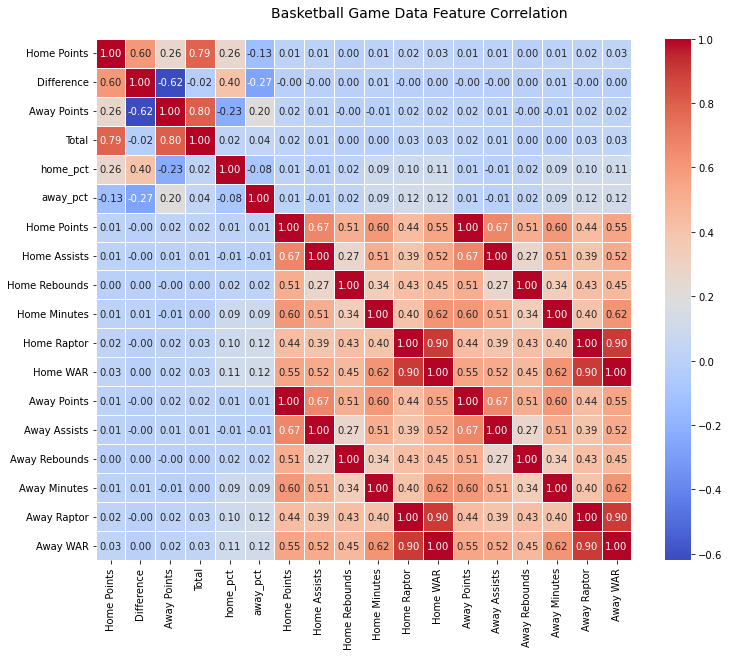

In [60]:
corrmat = corr_summary.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=0.5)
f.subplots_adjust(top=0.93)
t= f.suptitle('Basketball Game Data Feature Correlation', fontsize=14)

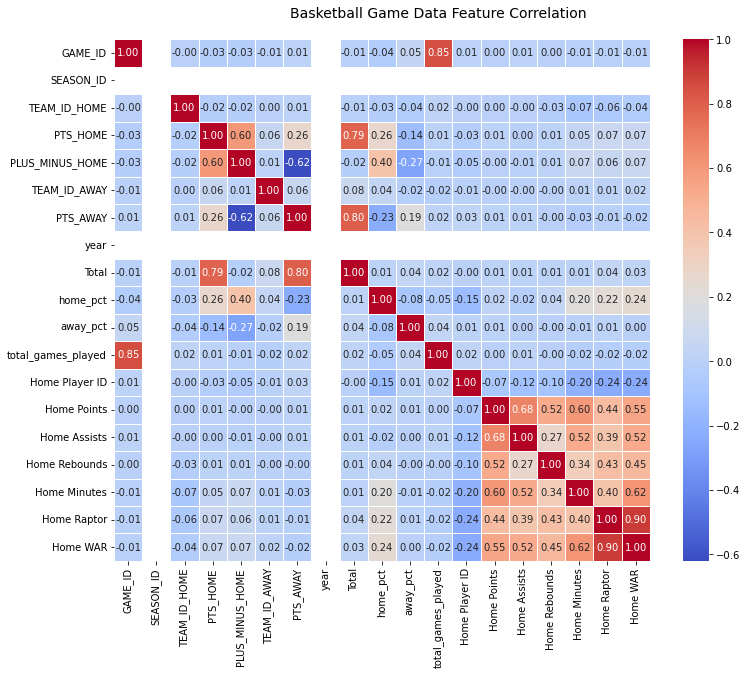

In [61]:
corrmat = summary_home.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=0.5)
f.subplots_adjust(top=0.93)
t= f.suptitle('Basketball Game Data Feature Correlation', fontsize=14)

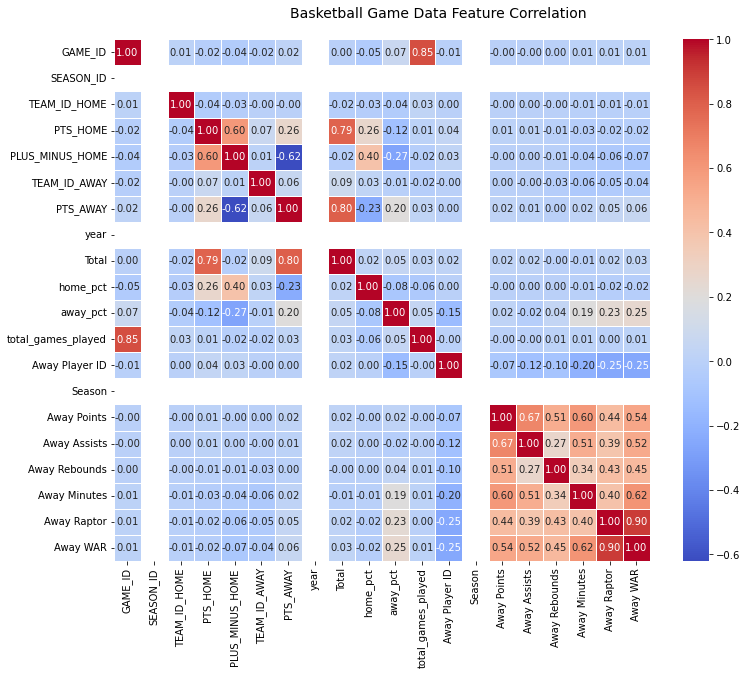

In [62]:
corrmat = summary_away.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=0.5)
f.subplots_adjust(top=0.93)
t= f.suptitle('Basketball Game Data Feature Correlation', fontsize=14)

In [63]:
summary_home = summary_home.drop(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'year', 'total_games_played',\
                                 'Home Player ID'],axis=1)

In [64]:
summary_away = summary_away.drop(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'year', 'total_games_played',\
                                 'Away Player ID', 'Season'],axis=1)

In [65]:
active_team.to_csv('active team FULL')
home_team.to_csv('home team FULL')
away_team.to_csv('away team FULL')

In [66]:
summary_home.to_csv('home summary FULL')
summary_away.to_csv('away summary FULL')
summary.to_csv('summary FULL')
corr_summary.to_csv('correlated summary FULL')

In [67]:
#Seems like the Game table isn't cohesive with the individual players and teams stats. I wonder if there's too many
#players with low stats that are inflencing this. I am going to add players are only in the roughly top 100 in the league
#in raptor.

raptor200 = pd.read_csv('raptor2020')
raptor200.head()
raptor200 = raptor200[['Player Name', 'season', 'Minutes Played', 'raptor_total', 'war_reg_season']]
raptor200 = raptor200.rename(columns = {'raptor_total': 'Raptor Total', 'war_reg_season':'WAR'})
raptor200.head()
raptor200.shape

(346, 5)

In [68]:
print(raptor200[raptor200['Raptor Total'].astype(int) >=1].count())
raptor_new = raptor200[raptor200['Raptor Total'].astype(int) >= 1]
rap_player = pd.merge(player, raptor_new, how='left', on=['Player Name'])
player_team = pd.merge(team, rap_player, how='left', on=['TEAM_ID'])
player_team = player_team.drop(['city', 'abbreviation', 'Current Player', 'season', 'TEAM_NAME','state', 'nickname', 'year_founded', 'TEAM_ABBREVIATION'], axis=1)
player_team = player_team.loc[:, ~player_team.columns.str.contains('^Unnamed')]
player_team.dtypes
active_team = player_team[player_team['ROSTERSTATUS'] == 'Active']
active_team.head()
active_team.shape
active_team['Raptor Total'].unique()


Player Name       109
season            109
Minutes Played    109
Raptor Total      109
WAR               109
dtype: int64


array([ 1.21429693,  3.13146593,         nan,  2.45897502,  2.65858968,
        3.71642791,  1.78849602,  2.90680253,  5.50841258,  1.10287524,
        4.73302636,  3.14298639,  2.46463595,  2.33495115,  1.16089046,
        1.97320468,  2.61115138,  1.44179222,  1.09059619,  2.16680507,
        2.10031263,  6.32915094,  1.00119567,  3.4273218 ,  2.40485549,
        2.523097  ,  5.07695189,  3.66817869,  1.71273093,  1.10504369,
        4.44509814,  1.83938409,  4.52257905,  6.33115168,  9.63838587,
        1.27644618,  4.64930764,  2.42343492,  7.43060452,  1.67986524,
        3.15202571,  7.82713337,  1.30173529,  1.37956518,  2.12270358,
        5.599469  ,  1.58938394,  2.51845653,  8.77826692,  3.06173616,
        4.69653985,  1.8900452 ,  4.66593131,  2.57727611,  1.58121313,
        6.66214982,  1.18392453, 10.46684259,  2.77448324,  1.13473151,
        2.97881412,  1.16794705,  4.31777222,  3.91990995,  2.24029694,
        1.11292824,  2.45719928,  1.2405158 ,  1.37985126,  2.70

In [69]:
missing_rap = active_team[['Raptor Total']].isnull().sum(axis=1)
active_team = active_team[missing_rap == 0]
missing = pd.concat([active_team.isnull().sum(), 100 * active_team.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'])

,count,%
TEAM_ID,0,0.0
full_name,0,0.0
Player ID,0,0.0
Player Name,0,0.0
ROSTERSTATUS,0,0.0
TO_YEAR,0,0.0
PTS,0,0.0
AST,0,0.0
REB,0,0.0
Minutes Played,0,0.0


In [70]:
active_team['Raptor Total'].sort_values()

133     1.001196
99      1.090596
46      1.102875
218     1.105044
460     1.112928
         ...    
257     7.430605
265     7.827133
310     8.778267
240     9.638386
376    10.466843
Name: Raptor Total, Length: 107, dtype: float64

In [71]:
active_team.shape
active_team.columns

Index(['TEAM_ID', 'full_name', 'Player ID', 'Player Name', 'ROSTERSTATUS',
       'TO_YEAR', 'PTS', 'AST', 'REB', 'Minutes Played', 'Raptor Total',
       'WAR'],
      dtype='object')

In [72]:
away_team = active_team
away_team = away_team.rename(columns = {'TEAM_ID':'TEAM_ID_AWAY', 'Player ID':'Away Player ID','full_name':'Away Team', \
                                       'abbreviation':'Away Short', 'Player Name': 'Away Player', 'TO_YEAR':'Season', \
                                       'ROSTERSTATUS':'Away Active?', 'PTS':'Away Points', 'AST':'Away Assists', 'REB':'Away Rebounds',\
                                       'Minutes Played':'Away Minutes','Raptor Total':'Away Raptor','WAR':'Away WAR'})
away_team = away_team.drop(['Away Active?'], axis=1)
away_team.head()

home_team = active_team
home_team = home_team.rename(columns = {'TEAM_ID':'TEAM_ID_HOME', 'Player ID':'Home Player ID','full_name':'Home Team', \
                                       'abbreviation':'Home Short', 'Player Name': 'Home Player', 'TO_YEAR':'Season', \
                                       'ROSTERSTATUS':'Active?', 'PTS':'Home Points', 'AST':'Home Assists', 'REB':'Home Rebounds',\
                                       'Minutes Played':'Home Minutes','Raptor Total':'Home Raptor','WAR':'Home WAR'})
home_team = home_team.drop(['Active?', 'Season'], axis=1)
home_team.dtypes

TEAM_ID_HOME        int64
Home Team          object
Home Player ID      int64
Home Player        object
Home Points       float64
Home Assists      float64
Home Rebounds     float64
Home Minutes      float64
Home Raptor       float64
Home WAR          float64
dtype: object

In [73]:
summary_away = pd.merge(games_40, away_team, how='left', on=['TEAM_ID_AWAY'])
summary_away.head()
summary_away.columns

summary_home = pd.merge(games_40, home_team, how='left', on=['TEAM_ID_HOME'])
summary_home.head()
summary_home.columns

summary = pd.concat([summary_home, summary_away])
summary = summary.drop(['Season', 'total_games_played', 'WL_HOME', 'WL_AWAY','SEASON_ID', 'TEAM_NAME_HOME', 'TEAM_NAME_AWAY'], axis=1)

summary = summary.rename(columns = {'GAME_ID':'Game ID', 'TEAM_ID_HOME':'Home ID', 'TEAM_ABBREVIATION_HOME':'Short Home',\
                          'TEAM_NAME_HOME':'Home Team', 'PTS_HOME':'Home Points', 'PLUS_MINUS_HOME':'Difference', \
                          'TEAM_ID_AWAY':'Away ID', 'TEAM_ABBREVIATION_AWAY':'Short Away', 'PTS_AWAY':'Away Points'})
summary.columns
summary.shape

(5417, 30)

In [74]:
corr_summary = summary
corr_summary = summary.drop(['Game ID', 'Home ID', 'Short Home', 'Away ID', 'Short Away', 'Home Team', 'Home Player ID',\
                            'Home Player', 'Away Team', 'Away Player ID', 'Away Player'], axis=1)

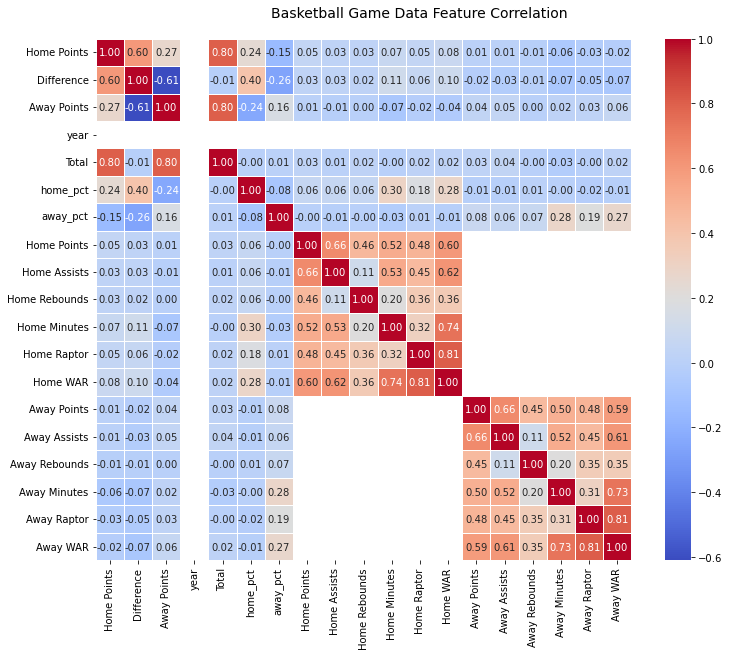

In [75]:
corrmat = corr_summary.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=0.5)
f.subplots_adjust(top=0.93)
t= f.suptitle('Basketball Game Data Feature Correlation', fontsize=14)

In [76]:
summary_home = summary_home.drop(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'year', 'total_games_played',\
                                 'Home Player ID'],axis=1)
summary_away = summary_away.drop(['GAME_ID', 'SEASON_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'year', 'total_games_played',\
                                 'Away Player ID', 'Season'],axis=1)

In [77]:
active_team.to_csv('active team top 100')
home_team.to_csv('home team top 100')
away_team.to_csv('away team top 100')
rap_player.to_csv('raptor player merge top 100')
player_team.to_csv('player team merge top 100')

In [78]:
summary_home.to_csv('home summary top 100')
summary_away.to_csv('away summary top 100')
summary.to_csv('summary top 100')
corr_summary.to_csv('correlated summary top 100')
games_40.to_csv('40 games plus')